In [5]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data/barometer.csv', index_col='date', parse_dates=True)
data

,spy_o,spy_h,spy_l,spy_c,barometer_o,barometer_h,barometer_l,barometer_c,barometer
date,,,,,,,,,
2011-01-04,127.330002,127.370003,126.190002,126.980003,0.735319,0.710359,0.730163,0.729770,0.726402
2011-01-05,126.580002,127.720001,126.459999,127.639999,0.736756,0.727568,0.737004,0.732432,0.733440
2011-01-06,127.690002,127.830002,127.010002,127.389999,0.745316,0.720177,0.746181,0.718896,0.732642
2011-01-07,127.559998,127.769997,126.150002,127.139999,0.781834,0.732432,0.809063,0.785350,0.777170
2011-01-10,126.580002,127.160004,126.199997,126.980003,0.687500,0.663383,0.712302,0.713156,0.694085
...,...,...,...,...,...,...,...,...,...
2022-01-13,472.190002,472.880005,463.440000,464.530000,0.838650,0.640906,0.879066,0.647780,0.751601
2022-01-14,461.190002,465.079987,459.899994,464.910004,0.620372,0.471715,0.767186,0.754965,0.653560
2022-01-18,459.739990,459.940002,455.309998,455.795013,0.429165,0.268332,0.419280,0.296257,0.353259


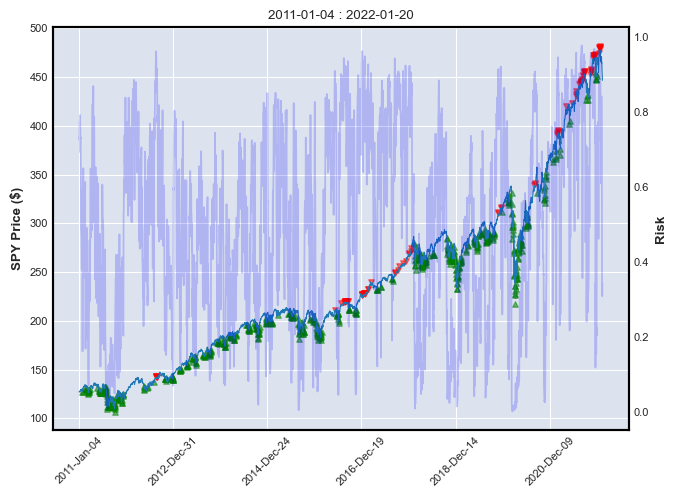

In [9]:
ticker = 'spy'
df = data.iloc[:].copy()

signal = df.barometer.map(lambda x: x < 0.3)
indx_list = signal[signal == True].index
df_signal_up = pd.DataFrame()
df_signal_up.index = signal.index
df_signal_up['value'] = np.NaN
for indx in indx_list:  
    df_signal_up.loc[indx] = df.loc[indx]['{}_l'.format(ticker)] * 0.995

signal = df.barometer.map(lambda x: x > 0.90)
indx_list = signal[signal == True].index
df_signal_down = pd.DataFrame()
df_signal_down.index = signal.index
df_signal_down['value'] = np.NaN
for indx in indx_list:  
    df_signal_down.loc[indx] = df.loc[indx]['{}_h'.format(ticker)] * 1.005

apds = [
    mpf.make_addplot(df_signal_up,type='scatter',markersize=15,color = 'green',alpha = 0.5, marker='^'),
    mpf.make_addplot(df_signal_down,type='scatter',markersize=15,color = 'red',alpha = 0.5, marker='v'),   
    mpf.make_addplot(df.barometer, type='line', alpha = 0.2, color = 'blue', ylabel = 'Risk'), 
    
    ]

mpf.plot(
            df.rename(columns={"{}_o".format(ticker): "Open", "{}_h".format(ticker): "High", 
                                       "{}_l".format(ticker): "Low", "{}_c".format(ticker): "Close"}),
            type='line', 
            ylabel='SPY Price ($)',
            addplot=apds,
            figscale=1,
            style = mpf.make_mpf_style(base_mpf_style='default', rc={'font.size':8}), 
            axtitle='{} : {}'.format(str(df.index[0])[:10], str(df.index[-1])[:10]),
         )  

In [10]:
data['Date'] = data.index
df = data.groupby(pd.Grouper(key='Date', freq='1m'))['spy_c', 'barometer'].mean()

C:\Users\moham\AppData\Local\Temp/ipykernel_16020/165723767.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(pd.Grouper(key='Date', freq='1m'))['spy_c', 'barometer'].mean()


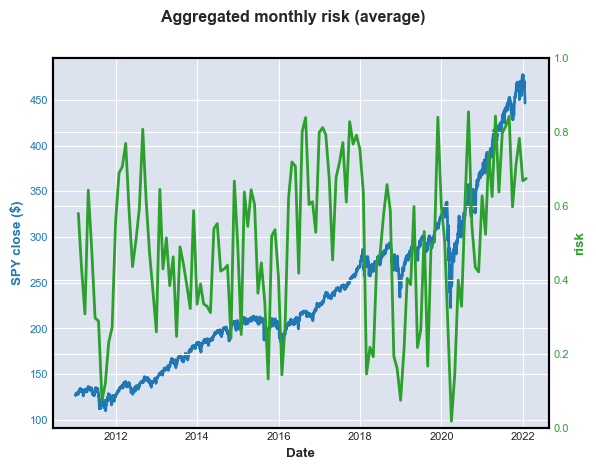

In [11]:
fig, ax1 = plt.subplots()
   
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY close ($)', color = color)
ax1.plot(data.spy_c, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
   
ax2 = ax1.twinx()
   
color = 'tab:green'
ax2.set_ylabel('risk', color = color)
ax2.plot(df.barometer, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
plt.grid(True)
plt.ylim(0, 1)
fig.suptitle('Aggregated monthly risk (average)', fontweight ="bold")
plt.show()